In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# !wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -P drive/My\ Drive

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version


In [0]:
# import shutil
# shutil.unpack_archive("/content/drive/My Drive/cifar-10-python.tar.gz", "/content/drive/My Drive/")

In [27]:
import pandas as pd
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
import os
import platform
from subprocess import check_output
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

%matplotlib inline


img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000,3,32,32).transpose(0,2,3,1).astype("float32")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=10000):
    # Load the raw CIFAR-10 data
    cifar10_dir = '/content/drive/My Drive/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    x_train = X_train.astype('float32')
    x_test = X_test.astype('float32')

    x_train /= 255
    x_test /= 255

    return x_train, y_train, X_val, y_val, x_test, y_test


# Invoke the above function to get our data.
x_train, y_train, x_val, y_val, x_test, y_test = get_CIFAR10_data()


print('Train data shape: ', x_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', x_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
enc = OneHotEncoder(sparse=False)
y_train = np.reshape(y_train, (-1,1))
y_train = enc.fit_transform(y_train)

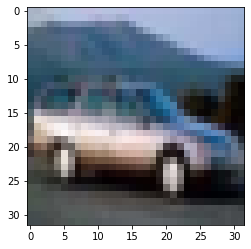

In [30]:
image = x_train[4]

 
plt.imshow(image)
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
# from tensorflow import keras 
from keras.callbacks import TensorBoard
import keras
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [0]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(32,32,3),kernel_size=(3,3), strides=(1,1), padding='valid',kernel_initializer= 'glorot_normal'))
model.add(LeakyReLU(0.3))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 2nd Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),padding='valid',kernel_initializer= 'glorot_normal'))
model.add(LeakyReLU(0.3))
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1), padding='valid',kernel_initializer= 'glorot_normal'))
model.add(LeakyReLU(0.3))
model.add(BatchNormalization())

model.add(Dropout(0.2))

# 4th Convolutional Layer


model.add(Conv2D(filters=64, kernel_size=(3,3) ,strides=(2,2), padding='valid',kernel_initializer= 'glorot_normal'))
model.add(LeakyReLU(0.3))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3),strides=(1,1), padding='valid',kernel_initializer= 'glorot_normal'))
model.add(LeakyReLU(0.3))

model.add(Dropout(0.2))

# 4th Convolutional Layer

model.add(Conv2D(filters=128, kernel_size=(3,3) ,strides=(2,2), padding='valid',kernel_initializer= 'glorot_normal'))
model.add(LeakyReLU(0.3))

model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(Dropout(0.2))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(128, input_shape=(32*32*3,)))
model.add(LeakyReLU(0.3))

model.add(Dropout(0.2))





# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
#once the model architechture is ready the model is compiled
# For a multi-class classification problem
opt =  Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True)
model.compile(optimizer= opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

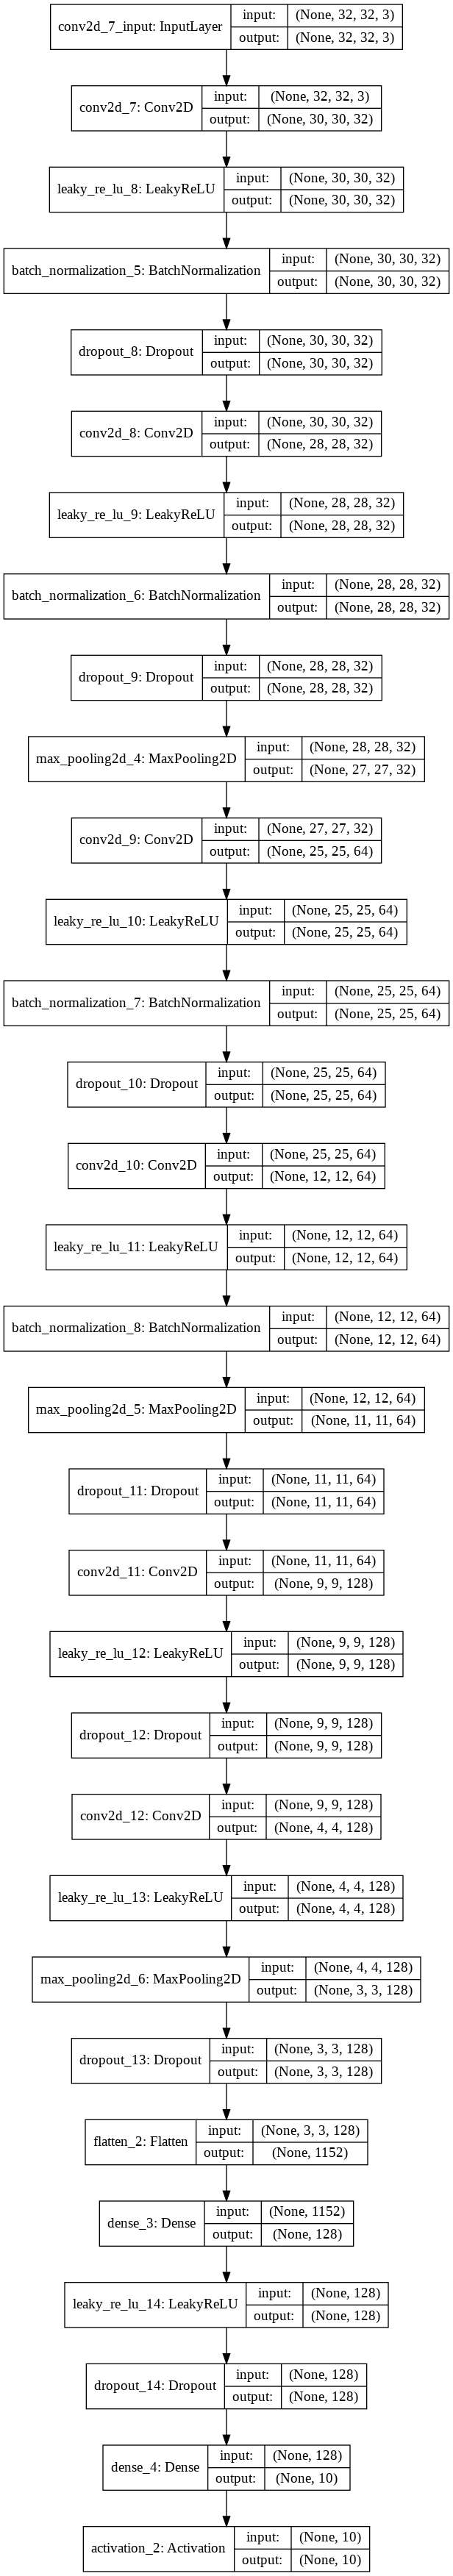

In [34]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)       

In [0]:
# logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=logdir)

In [37]:
model.fit(x_train, y_train, epochs=120,validation_split=0.33, batch_size=32,callbacks=[tensorboard_callback])

Train on 32830 samples, validate on 16170 samples
Epoch 1/120
  384/32830 [..............................] - ETA: 1:52 - loss: 2.9857 - accuracy: 0.1276

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.148967). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


32830/32830 [==============================] - 23s 701us/step - loss: 1.6613 - accuracy: 0.4061 - val_loss: 1.6043 - val_accuracy: 0.4665
Epoch 2/120
32830/32830 [==============================] - 22s 666us/step - loss: 1.2677 - accuracy: 0.5535 - val_loss: 1.1600 - val_accuracy: 0.5952
Epoch 3/120
32830/32830 [==============================] - 22s 661us/step - loss: 1.0872 - accuracy: 0.6155 - val_loss: 1.1947 - val_accuracy: 0.6081
Epoch 4/120
32830/32830 [==============================] - 22s 668us/step - loss: 0.9807 - accuracy: 0.6584 - val_loss: 1.0588 - val_accuracy: 0.6322
Epoch 5/120
32830/32830 [==============================] - 22s 661us/step - loss: 0.9142 - accuracy: 0.6788 - val_loss: 0.8772 - val_accuracy: 0.6906
Epoch 6/120
32830/32830 [==============================] - 22s 662us/step - loss: 0.8541 - accuracy: 0.7010 - val_loss: 0.9336 - val_accuracy: 0.6753
Epoch 7/120
32830/32830 [==============================] - 22s 660us/step - loss: 0.8042 - accuracy: 0.7187 - va

In [0]:
# %load_ext tensorboard
# %tensorboard --logdir logs/scalars

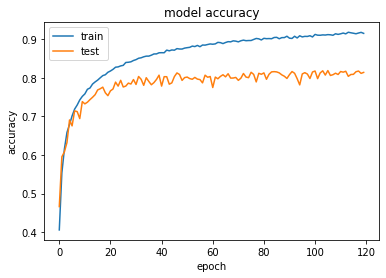

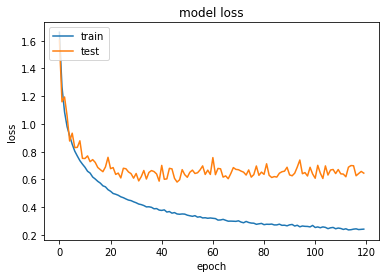

In [39]:
history1 = model.history.history
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history1['accuracy'])
plt.plot(history1['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1['loss'])
plt.plot(history1['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
enc = OneHotEncoder(sparse=False)
y_test = np.reshape(y_test, (-1,1))
y_test = enc.fit_transform(y_test)

In [41]:
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

10000/10000 [==============================] - 2s 199us/step
[0.6628992615103722, 0.8112000226974487]


In [0]:
y_test_1 = np.argmax(y_test, axis = 1)

In [0]:
pred = model.predict(x_test)
rounded_labels=np.argmax(pred, axis=1)


In [44]:
result = confusion_matrix(y_test_1, rounded_labels)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_1, rounded_labels)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_1,rounded_labels)
print("Accuracy:",result2*100)

Confusion Matrix:
[[823  11  44  25  23   3   7   7  34  23]
 [ 14 898   1   9   5   3   3   3  19  45]
 [ 52   0 676  79  62  55  44  23   8   1]
 [ 21   2  38 730  48 111  32  10   5   3]
 [  8   1  26  38 869  21  17  17   3   0]
 [  5   0  27 162  36 734   6  26   2   2]
 [  6   0  34  64  35  18 832   6   4   1]
 [  6   1  14  51  52  44   9 819   0   4]
 [ 59  16  12  14   7   6   4   2 866  14]
 [ 24  50   4  15   8   4   6   5  19 865]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1000
           1       0.92      0.90      0.91      1000
           2       0.77      0.68      0.72      1000
           3       0.61      0.73      0.67      1000
           4       0.76      0.87      0.81      1000
           5       0.73      0.73      0.73      1000
           6       0.87      0.83      0.85      1000
           7       0.89      0.82      0.85      1000
           8       0.90      0.87      0.